# Web Scrapping: Critics Reviews for Tiger King Season 1 from Rotten Tomatoes

In [54]:
#import requests and Beautiful Soup
import requests
from bs4 import BeautifulSoup

In [55]:
#create a list
#add urls of all pages of the full critics review webpage of Tiger King Season 1 in it.
#I have taken first 5 pages.
page_urls = ['http://rottentomatoes.com/tv/tiger_king/s01/reviews','https://www.rottentomatoes.com/tv/tiger_king/s01/reviews?type=&sort=&page=2','https://www.rottentomatoes.com/tv/tiger_king/s01/reviews?type=&sort=&page=3','https://www.rottentomatoes.com/tv/tiger_king/s01/reviews?type=&sort=&page=4','https://www.rottentomatoes.com/tv/tiger_king/s01/reviews?type=&sort=&page=5']

In [56]:
#create two empty list for appending reviews and tomato check.
reviews = []
tomato = []

#iterate through each url in the list.
for url in page_urls:
    response = requests.get(url)
    #check whether the response code is not 200. It means there is error in server response
    if response.status_code != 200:
        continue
    #if the response is 200, we can continue with scrapping the content of the response.
    else:
        html_code = response.content
        #choose 'lxml' as the parser for the application as it more efficient than other parsers.
        soup = BeautifulSoup(html_code, 'lxml')
        #find the html tag with review table as the class.
        review_table = soup.find('div',{'class':'review_table'})
        #iterate through every rows in the review table in the current page.
        for i in review_table.find_all('div',{'class':'critic__review-quote'}):
            #append the review in the list.
            reviews.append(i.get_text(strip=True))
        #iterate through every rows inorder to find the tomato.
        for j in review_table.find_all('div',{'class':'col-xs-16 review_container'}):
            a=j.find('div',{'class':'review_icon icon small fresh'}) or j.find('div',{'class':'review_icon icon small rotten'})
            #append the type in the list.
            tomato.append(a.attrs['class'][-1])            

In [57]:
#check the length of the review list. 
len(reviews)

85

In [58]:
#check the length of the tomato list.
len(tomato)

85

In [59]:
#import pandas for tabulating the data that was scrapped from the website
#import the necessary libraries for visualization
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [60]:
#convert the data into a dataframe
tiger_king_reviews = pd.DataFrame(zip(reviews,tomato), columns=['Critics Reviews','Rotten/Fresh'])

In [61]:
tiger_king_reviews.head()

,Critics Reviews,Rotten/Fresh
0,"Subtitled Murder, Mayhem and Madness, Tiger Ki...",fresh
1,...the documentary is too swept up by Exotic's...,rotten
2,"Enthralling in an aghast kind of way, like wat...",rotten
3,"It's a highly watchable docu-series, with insi...",fresh
4,"The storyline is eye-poppingly bizarre, not to...",rotten


In [62]:
tiger_king_reviews.tail()

,Critics Reviews,Rotten/Fresh
80,Tiger King is not an uplifting object to gathe...,fresh
81,Tiger King is Netflix comfort food of the high...,fresh
82,"Tiger King: Murder, Mayhem and Madness lives u...",fresh
83,"Whatever flaws it might have, Tiger King is a ...",fresh
84,This show feels like Florida man unchained.,fresh


In [63]:
#save the dataframe as a csv file
tiger_king_reviews.to_csv("tiger_king_rottentomatoes_critics.csv",index=True)

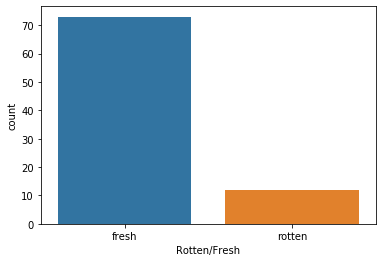

In [64]:
#Graphical representage of tomato count
sns.countplot(tiger_king_reviews['Rotten/Fresh'])

In [65]:
tomato_meter = tiger_king_reviews['Rotten/Fresh'].value_counts('fresh')[0]

In [66]:
#Tomato meter
print("THE TOMATOMETER VALUE FOR TIGER KING: SEASON 1 IS: {}%".format(round(tomato_meter*100)))

THE TOMATOMETER VALUE FOR TIGER KING: SEASON 1 IS: 86.0%
